# Notebook for visualization (Demand Forecasting Model)

In [1]:
import numpy as np
import pandas as pd


from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler


df_energy = pd.read_csv("C:/Users/pacos/Desktop/AWS_Group_Project/Complete Datasets/energy_dataset.csv")

df_weather = pd.read_csv("C:/Users/pacos/Desktop/AWS_Group_Project/Complete Datasets/weather_features.csv")

df = pd.merge(df_energy, df_weather, left_on='time', right_on='dt_iso', how='right')

df.drop(columns=['dt_iso', 'generation fossil coal-derived gas',
                 'generation fossil oil shale', 'generation fossil peat', 
                 'generation geothermal', 'generation marine', 'generation wind offshore', 
                 'generation hydro pumped storage aggregated',
                 'forecast wind offshore eday ahead', 'weather_description', 
                 'weather_id', 'weather_icon', 'forecast solar day ahead', 
                 'forecast wind onshore day ahead', 'total load forecast','price actual'], axis=1, inplace=True)

# Split the 'time' column into 'date' and 'hour' columns
df[['date', 'hour']] = df['time'].str.split(' ', expand=True)

# Split the 'hour' column further to exclude the timezone information
df['hour'] = df['hour'].str.split('+', expand=True)[0]

# Now we can drop the 'time' column, since we won't need it anymore to merge the tables
df.drop('time', axis=1, inplace=True)

# Drop NAs in the target variable
df = df.dropna(subset=['total load actual'])

# Create X matrix and y array
y = df['total load actual']
X = df.drop('total load actual', axis = 1)

In [2]:
# Create one-hot encoded columns for city_name
X = pd.get_dummies(X, columns=['city_name'])
X = pd.get_dummies(X, columns=['weather_main'])

In [3]:

### Adjust the date column
X['date'] = pd.to_datetime(X['date'])
# Double-validate the correct format of the date
X['date'] = X['date'].dt.strftime('%Y-%m-%d')

# Extract the year, month, and day components from the 'date' column
X['year'] = X['date'].apply(lambda x: int(x[:4]))
X['month'] = X['date'].apply(lambda x: int(x[5:7]))
X['day'] = X['date'].apply(lambda x: int(x[8:10]))
# Drop original column
X.drop('date', axis=1, inplace=True)


### Adjust the time column
from datetime import datetime
X['hour'] = X['hour'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
# We need to use apply since it's a Series
X['hour'] = X['hour'].apply(lambda x: x.hour)

In [4]:
df = pd.concat([y, X], axis=1)

In [5]:
df_predictions = pd.read_csv("C:/Users/pacos/Desktop/AWS_Group_Project/predictions_10000.csv")

In [6]:
df_predictions

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,weather_main_dust,weather_main_fog,weather_main_haze,weather_main_mist,weather_main_rain,weather_main_smoke,weather_main_snow,weather_main_squall,weather_main_thunderstorm,predicted_value
0,168,680,8107,6885,127,2022,83,1068,5640,95,...,0,0,0,0,0,1,0,0,0,27510.937500
1,148,650,5110,879,100,3739,1478,4271,6103,65,...,0,0,0,0,0,0,0,0,0,25930.316406
2,471,697,7168,7021,101,93,1061,4191,5590,9,...,0,0,0,0,1,0,0,0,0,35357.191406
3,134,277,7950,1762,468,278,1693,2177,2570,32,...,0,0,0,0,0,1,0,0,0,29928.044922
4,355,654,10096,1256,390,2404,469,3566,6350,4,...,0,0,0,0,0,0,0,0,0,29190.597656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,154,431,11159,6694,6,3047,1705,6351,4286,10,...,0,0,0,1,0,0,0,0,0,31193.765625
9996,259,940,1952,7607,472,1842,1159,2501,6389,7,...,0,0,0,0,1,0,0,0,0,29988.138672
9997,5,50,5836,1494,366,2857,658,4312,6779,60,...,0,0,0,0,0,0,0,0,0,32251.156250
9998,244,638,2319,1905,8,693,1844,2279,5818,5,...,0,0,0,0,0,0,0,0,0,26665.205078


In [7]:
df_predictions.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'price day ahead',
       'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'year',
       'month', 'day', 'hour', 'city_name_ Barcelona', 'city_name_Bilbao',
       'city_name_Madrid', 'city_name_Seville', 'city_name_Valencia',
       'weather_main_clear', 'weather_main_clouds', 'weather_main_drizzle',
       'weather_main_dust', 'weather_main_fog', 'weather_main_haze',
       'weather_main_mist', 'weather_main_rain', 'weather_main_smoke',
       'w

# Base Plot

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# define the columns to group by and aggregate
group_cols = ['month', 'day']
# target variable
agg_col = 'total load actual'

# group the training data by the specified columns and aggregate the target variable
train_agg = df.groupby(group_cols).agg({agg_col: 'mean'}).reset_index()

# get the row of the prediction dataframe you want to plot
pred_row = df_predictions.loc[20]

# extract the values for the group columns from the prediction row
pred_group = tuple(pred_row[group_cols].values.astype(int))



In [9]:
train_agg

,month,day,total load actual
0,1,1,22902.188406
1,1,2,30376.765560
2,1,3,30071.614141
3,1,4,26430.868526
4,1,5,22625.105485
...,...,...,...
361,12,27,27476.072165
362,12,28,28436.944099
363,12,29,27652.136735
364,12,30,26638.604938


In [10]:
#tuple(pred_group)

In [11]:
# find the matching group in the training data and extract the aggregated value
train_agg_val = train_agg.loc[train_agg[group_cols].apply(lambda x: tuple(x.values) == pred_group, axis=1), agg_col].values[0]

In [12]:
train_agg_val

32432.76923076923

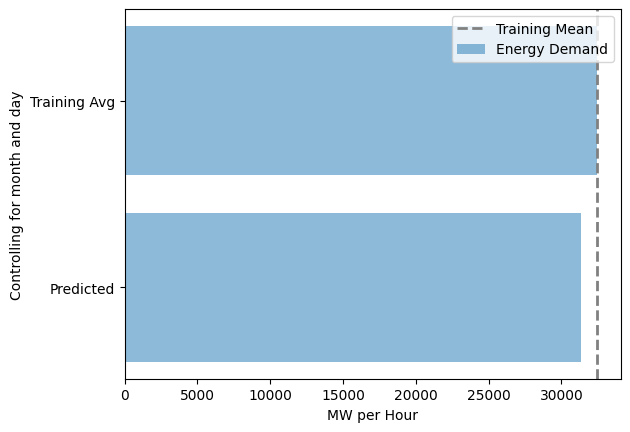

In [13]:
# plot the predicted value and the training data average
plt.barh(['Predicted', 'Training Avg'], [pred_row['predicted_value'], train_agg_val], alpha=0.5, label='Energy Demand')
plt.axvline(x=df.loc[df[group_cols].apply(lambda x: tuple(x.values) == pred_group, axis=1), agg_col].values.mean(), color='gray', linestyle='dashed', linewidth=2, label='Training Mean')
plt.xlabel('MW per Hour')
plt.ylabel('Controlling for month and day')
plt.legend(loc='upper right')
plt.show()


# Graph 2: Grouped by City

In [14]:
# create a list of the dummy columns
dummy_cols = ['city_name_ Barcelona', 'city_name_Bilbao', 'city_name_Madrid', 'city_name_Seville', 'city_name_Valencia']

# create a new column called 'city' by finding the column with the highest value for each row
df['city'] = df[dummy_cols].idxmax(axis=1).str.replace('city_name_', '')


In [15]:
df['city'].value_counts()

Madrid        36231
Bilbao        35915
Seville       35521
 Barcelona    35440
Valencia      35109
Name: city, dtype: int64

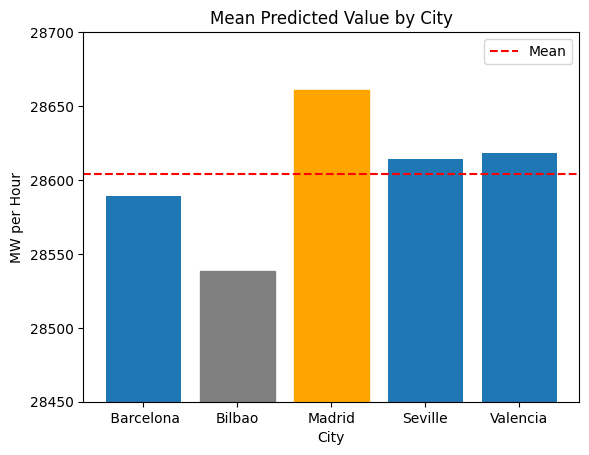

In [16]:
# create a new column called 'city' by finding the column with the highest value for each row
df_predictions['city'] = df_predictions[dummy_cols].idxmax(axis=1).str.replace('city_name_', '')

# group by city and compute the mean of predicted_value
grouped = df_predictions.groupby('city')['predicted_value'].mean()

# plot the bar chart
fig, ax = plt.subplots()
ax.bar(grouped.index, grouped.values)
ax.set_xlabel('City')
ax.set_ylabel('MW per Hour')
ax.set_title('Mean Predicted Value by City')

# set y-axis range
ax.set_ylim([28450, 28700])

# add mean line
mean_val = grouped.mean()
ax.axhline(y=mean_val, color='red', linestyle='--', label='Mean')

# colour Madrid column
rects = ax.patches
for i in range(len(rects)):
    if grouped.index[i] == 'Madrid':
        rects[i].set_color('orange')
    if grouped.index[i] == 'Bilbao':
        rects[i].set_color('gray')
    
    

plt.legend()
plt.show()


In [17]:
grouped

city
 Barcelona    28589.414161
Bilbao        28538.568746
Madrid        28661.152522
Seville       28614.459026
Valencia      28618.222126
Name: predicted_value, dtype: float64

### On Original Dataset

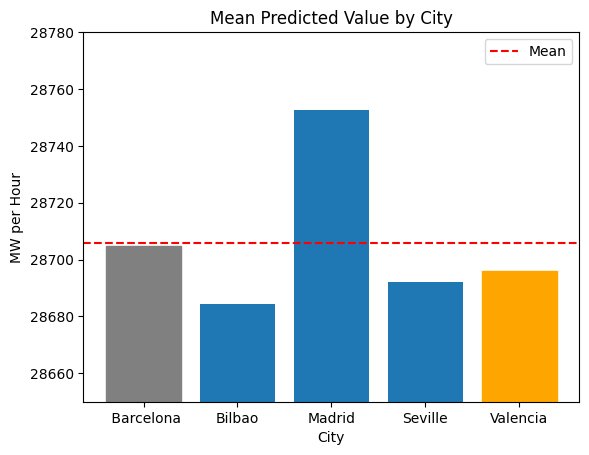

In [18]:
df_test = pd.merge(df_energy, df_weather, left_on='time', right_on='dt_iso', how='right')
# create a new column called 'city' by finding the column with the highest value for each row


# group by city and compute the mean of predicted_value
grouped = df_test.groupby('city_name')['total load actual'].mean()

# plot the bar chart
fig, ax = plt.subplots()
ax.bar(grouped.index, grouped.values)
ax.set_xlabel('City')
ax.set_ylabel('MW per Hour')
ax.set_title('Mean Predicted Value by City')

# set y-axis range
ax.set_ylim([28650, 28780])

# add mean line
mean_val = grouped.mean()
ax.axhline(y=mean_val, color='red', linestyle='--', label='Mean')

# colour Madrid column
rects = ax.patches
for i in range(len(rects)):
    if grouped.index[i] == 'Valencia':
        rects[i].set_color('orange')
    if grouped.index[i] == ' Barcelona':
        rects[i].set_color('gray')
    
    

plt.legend()
plt.show()


In [19]:
grouped

city_name
 Barcelona    28704.716874
Bilbao        28684.486064
Madrid        28752.719632
Seville       28691.940373
Valencia      28695.885129
Name: total load actual, dtype: float64

# Graph 3: Grouped by Weather

In [20]:
df_predictions.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'price day ahead',
       'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'year',
       'month', 'day', 'hour', 'city_name_ Barcelona', 'city_name_Bilbao',
       'city_name_Madrid', 'city_name_Seville', 'city_name_Valencia',
       'weather_main_clear', 'weather_main_clouds', 'weather_main_drizzle',
       'weather_main_dust', 'weather_main_fog', 'weather_main_haze',
       'weather_main_mist', 'weather_main_rain', 'weather_main_smoke',
       'w

In [21]:
# create a list of the dummy columns
dummy_cols_weather = ['weather_main_clear', 'weather_main_clouds', 'weather_main_drizzle', 
              'weather_main_dust', 'weather_main_fog', 'weather_main_haze',
             'weather_main_mist', 'weather_main_rain', 'weather_main_smoke', 'weather_main_snow',
             'weather_main_squall', 'weather_main_thunderstorm' ]

# create a new column called 'city' by finding the column with the highest value for each row
df['weather'] = df[dummy_cols_weather].idxmax(axis=1).str.replace('weather_main_', '')
df_predictions['weather'] = df_predictions[dummy_cols_weather].idxmax(axis=1).str.replace('weather_main_', '')



In [22]:
df['weather'].value_counts()

clear           82592
clouds          68002
rain            17357
mist             3908
fog              2506
drizzle          1724
thunderstorm     1041
haze              435
dust              347
snow              270
smoke              33
squall              1
Name: weather, dtype: int64

In [23]:
df_predictions['weather'].value_counts()

mist            954
smoke           949
clear           933
dust            927
fog             919
thunderstorm    905
haze            900
drizzle         892
clouds          886
snow            873
rain            862
Name: weather, dtype: int64

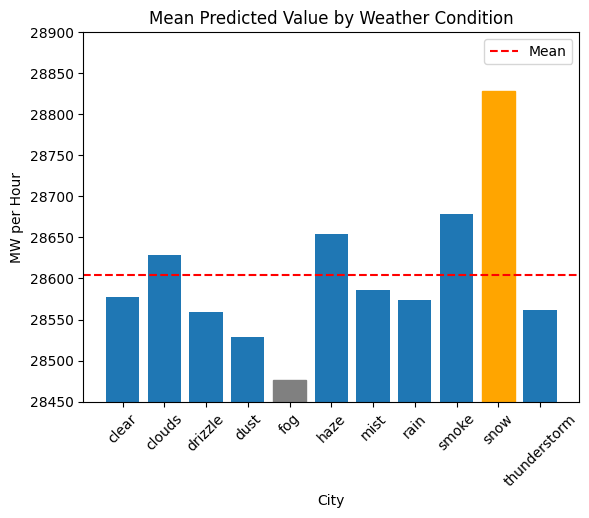

In [24]:
# group by city and compute the mean of predicted_value
grouped = df_predictions.groupby('weather')['predicted_value'].mean()

# plot the bar chart
fig, ax = plt.subplots()
ax.bar(grouped.index, grouped.values)
ax.set_xlabel('City')
ax.set_ylabel('MW per Hour')
ax.set_title('Mean Predicted Value by Weather Condition')

# set y-axis range
ax.set_ylim([28450, 28900])

# add mean line
mean_val = grouped.mean()
ax.axhline(y=mean_val, color='red', linestyle='--', label='Mean')

# colour Madrid column
rects = ax.patches
for i in range(len(rects)):
    if grouped.index[i] == 'fog':
        rects[i].set_color('gray')
    if grouped.index[i] == 'snow':
        rects[i].set_color('orange')
    
# rotate xticks
plt.xticks(rotation=45)   

plt.legend()
plt.show()


In [25]:
grouped

weather
clear           28577.842322
clouds          28628.641630
drizzle         28558.762465
dust            28529.083584
fog             28476.417535
haze            28654.058238
mist            28586.397891
rain            28573.439544
smoke           28678.089490
snow            28827.949758
thunderstorm    28562.165586
Name: predicted_value, dtype: float64

In [26]:
#df_test['weather_main'].value_counts()

## On Original Dataset

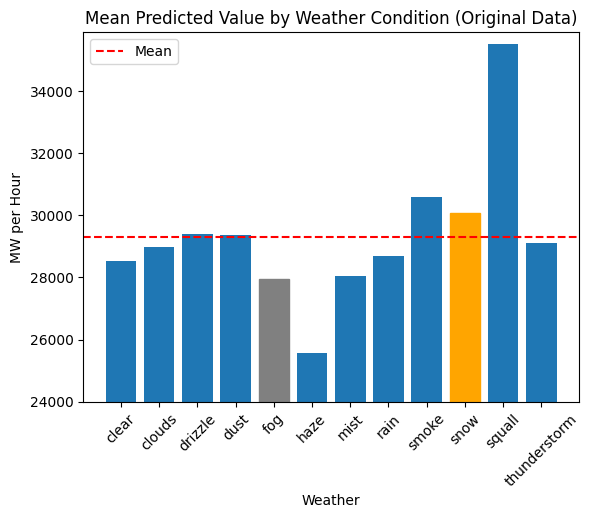

In [27]:
# group by city and compute the mean of predicted_value
grouped = df_test.groupby('weather_main')['total load actual'].mean()

# plot the bar chart
fig, ax = plt.subplots()
ax.bar(grouped.index, grouped.values)
ax.set_xlabel('Weather')
ax.set_ylabel('MW per Hour')
ax.set_title('Mean Predicted Value by Weather Condition (Original Data)')

# set y-axis range
ax.set_ylim([24000, 35900])

# add mean line
mean_val = grouped.mean()
ax.axhline(y=mean_val, color='red', linestyle='--', label='Mean')

# colour Madrid column
rects = ax.patches
for i in range(len(rects)):
    if grouped.index[i] == 'fog':
        rects[i].set_color('gray')
    if grouped.index[i] == 'snow':
        rects[i].set_color('orange')
    
# rotate xticks
plt.xticks(rotation=45)   

plt.legend()
plt.show()

In [28]:
grouped

weather_main
clear           28522.895244
clouds          28989.780124
drizzle         29405.969258
dust            29365.109510
fog             27938.253392
haze            25578.075862
mist            28038.327021
rain            28673.870888
smoke           30588.787879
snow            30062.196296
squall          35513.000000
thunderstorm    29115.577329
Name: total load actual, dtype: float64

# Graph 4: Grouped by Month

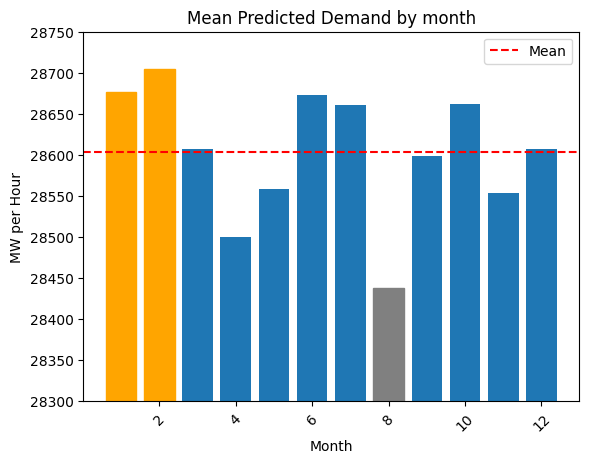

In [29]:
# group by city and compute the mean of predicted_value
grouped = df_predictions.groupby('month')['predicted_value'].mean()

# plot the bar chart
fig, ax = plt.subplots()
ax.bar(grouped.index, grouped.values)
ax.set_xlabel('Month')
ax.set_ylabel('MW per Hour')
ax.set_title('Mean Predicted Demand by month')

# set y-axis range
ax.set_ylim([28300, 28750])

# add mean line
mean_val = grouped.mean()
ax.axhline(y=mean_val, color='red', linestyle='--', label='Mean')

# colour Madrid column
rects = ax.patches
for i in range(len(rects)):
    if grouped.index[i] == 8:
        rects[i].set_color('gray')
    if grouped.index[i] < 3:
        rects[i].set_color('orange')
    
# rotate xticks
plt.xticks(rotation=45)   

plt.legend()
plt.show()

In [30]:
grouped

month
1     28676.358683
2     28704.121063
3     28607.259202
4     28500.339561
5     28558.803623
6     28673.163139
7     28660.930839
8     28438.354134
9     28598.198576
10    28662.424970
11    28554.292995
12    28607.357822
Name: predicted_value, dtype: float64

# Hexbins

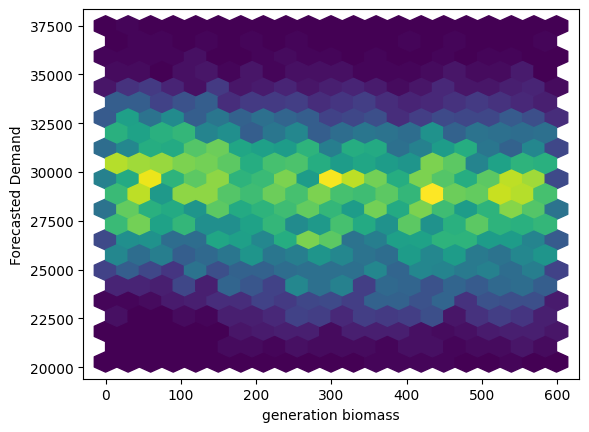

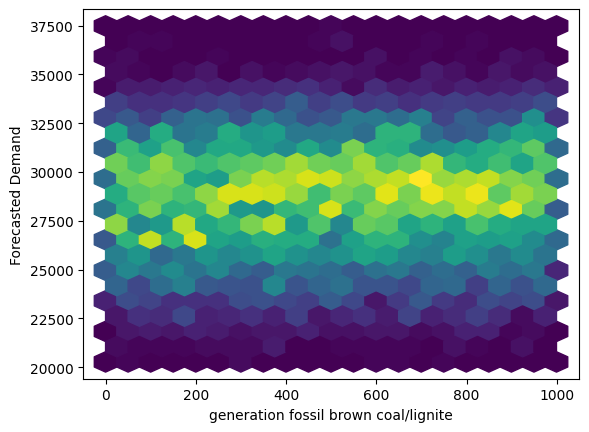

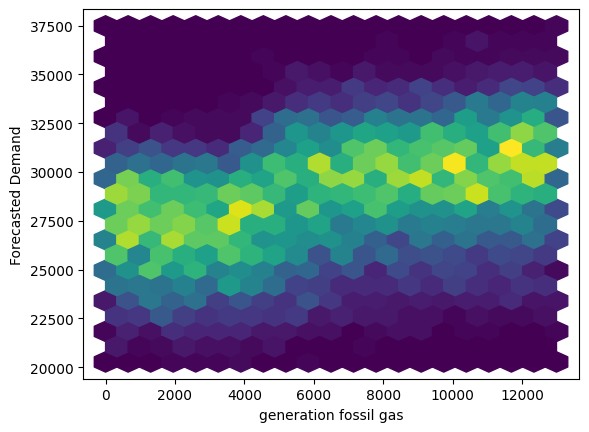

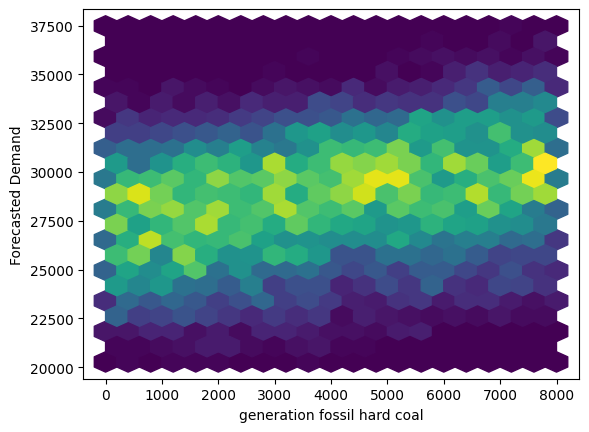

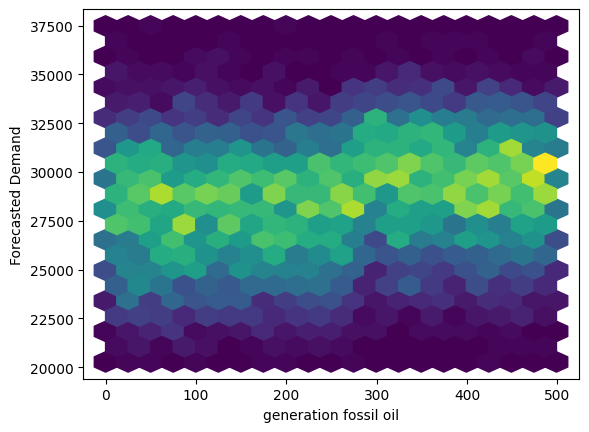

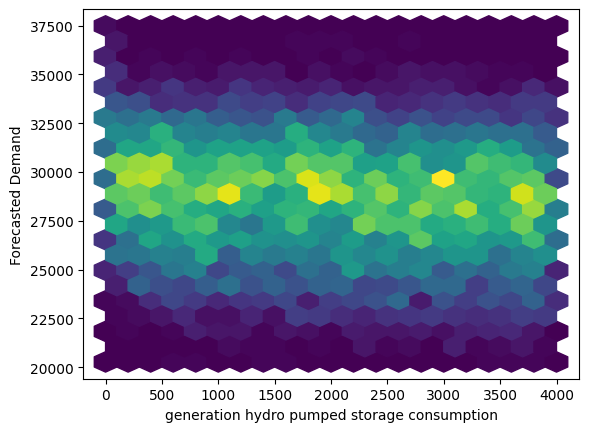

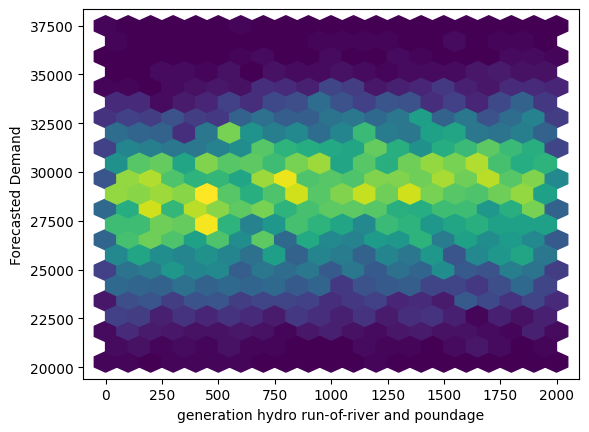

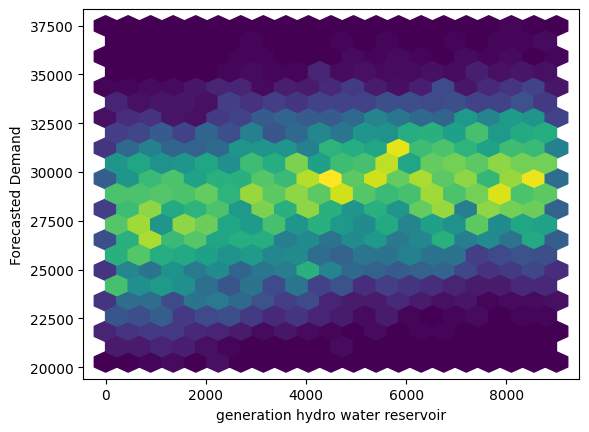

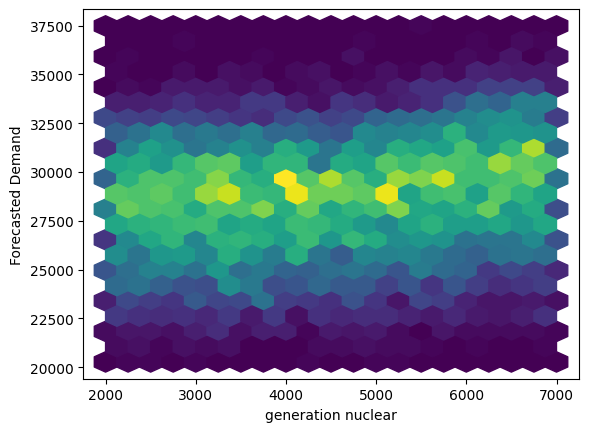

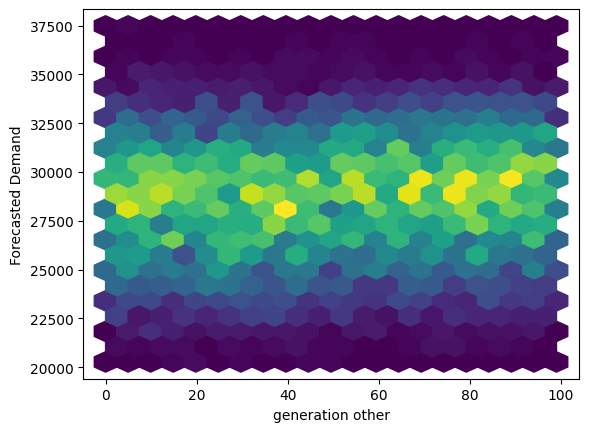

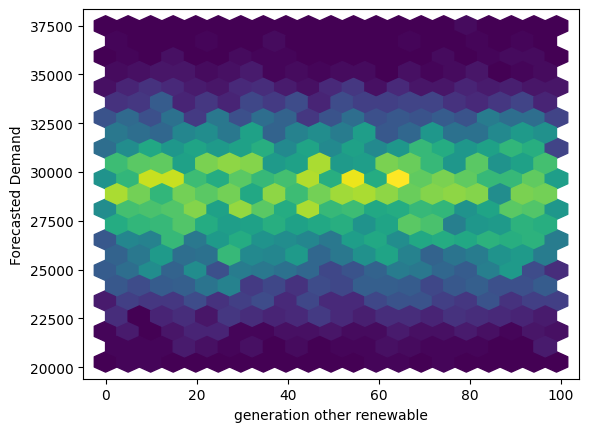

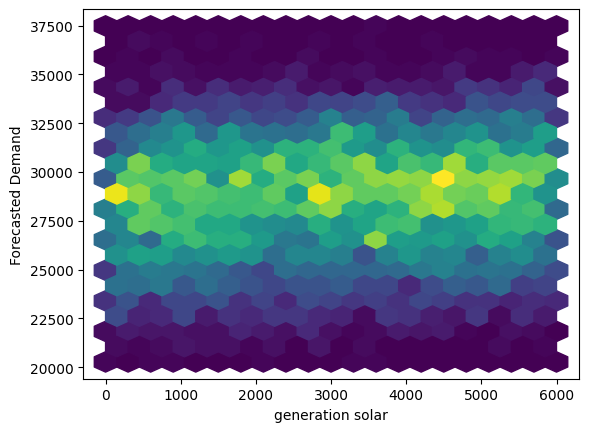

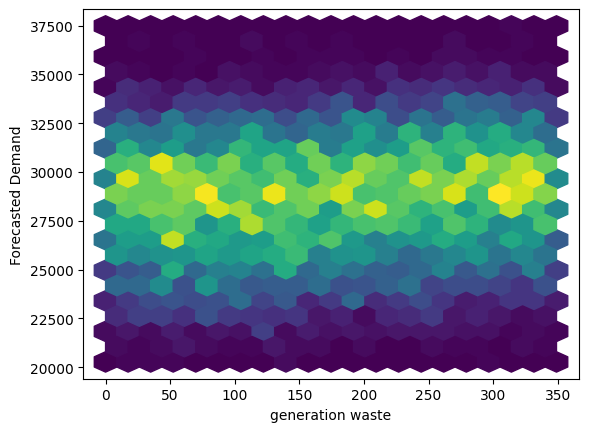

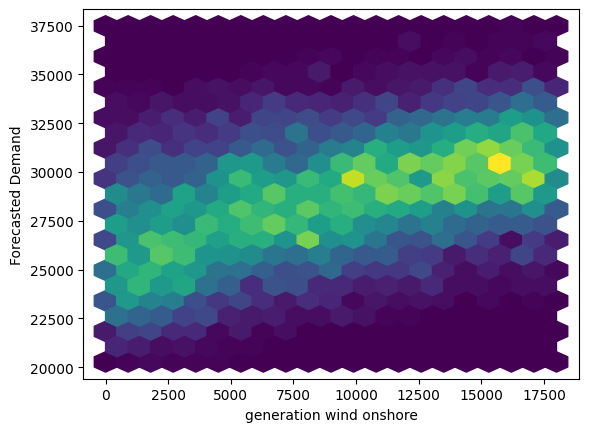

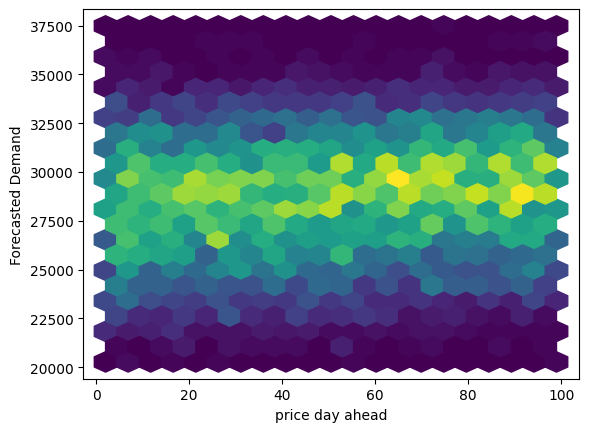

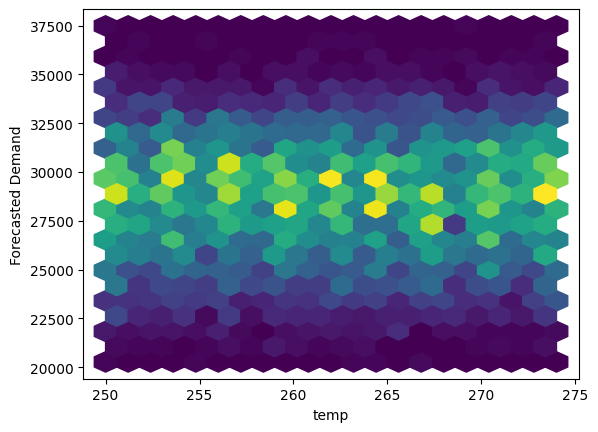

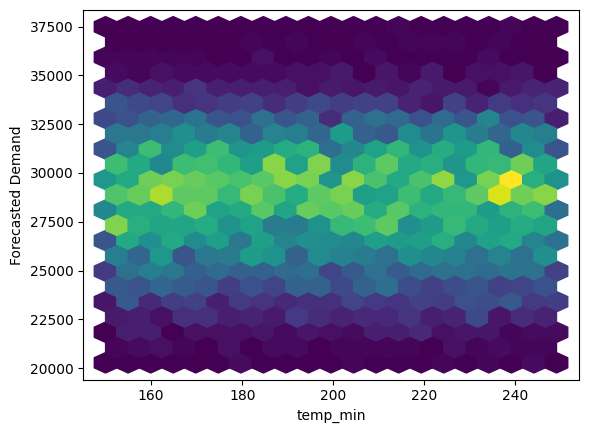

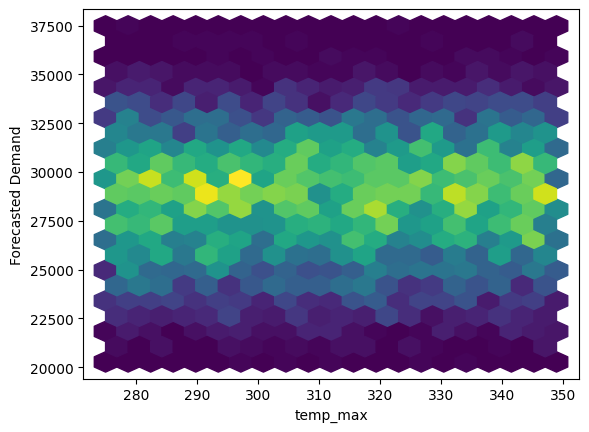

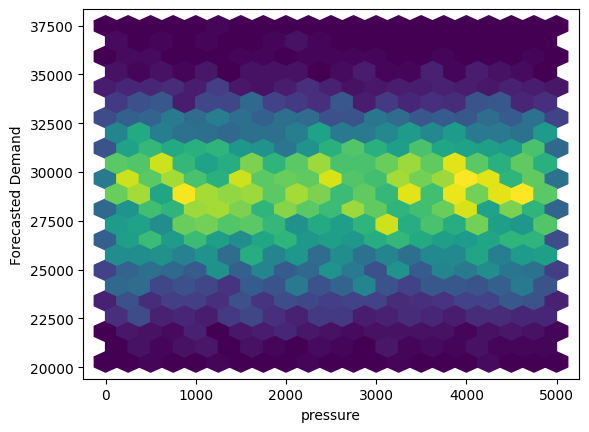

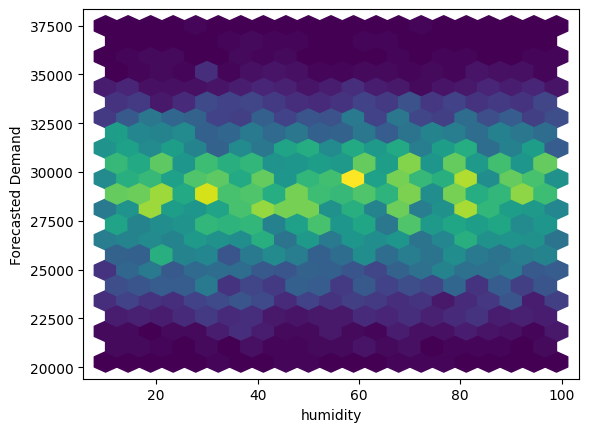

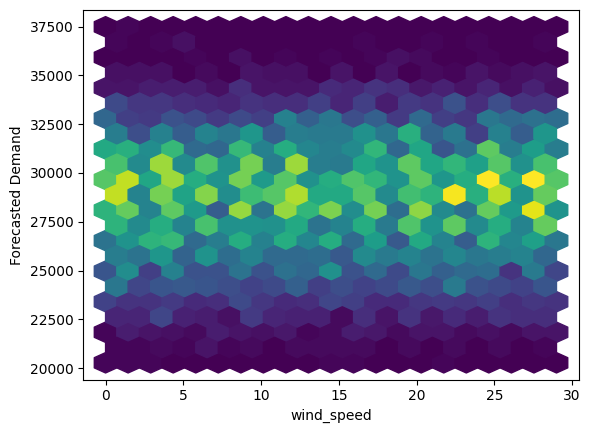

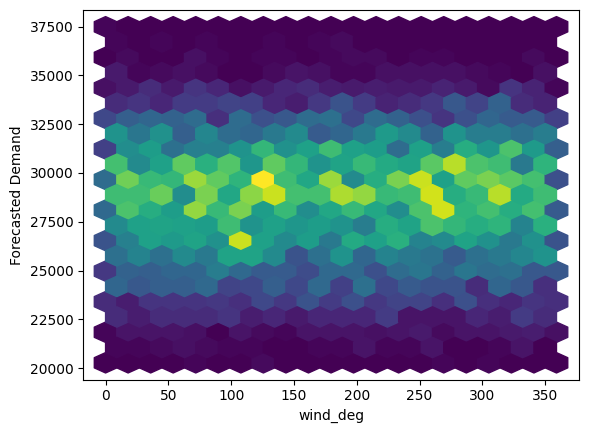

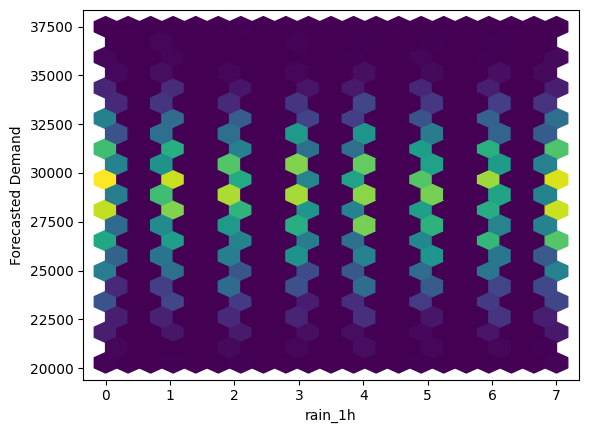

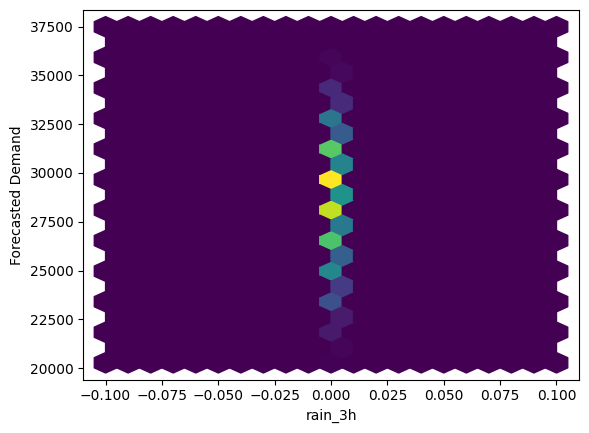

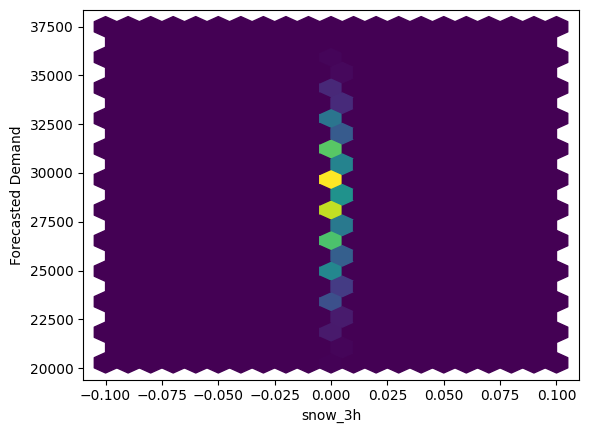

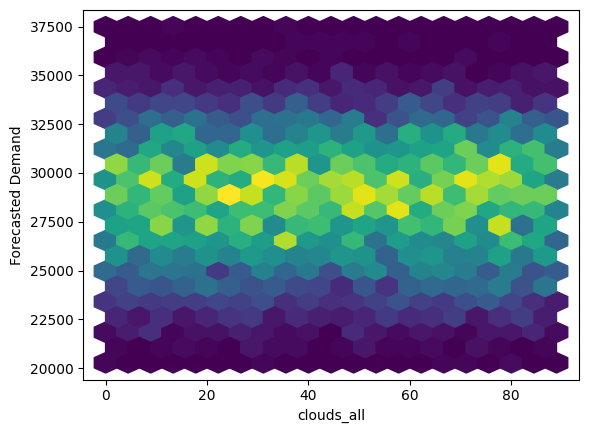

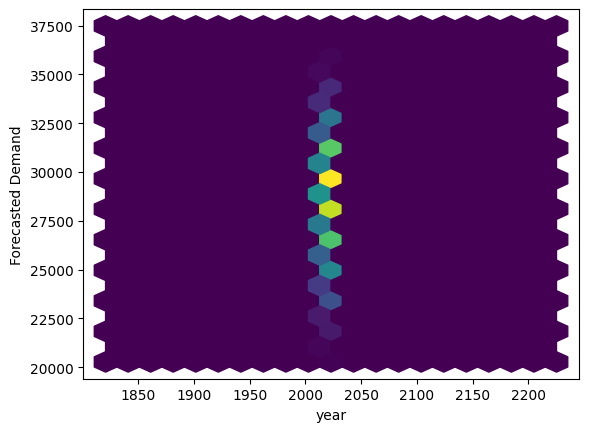

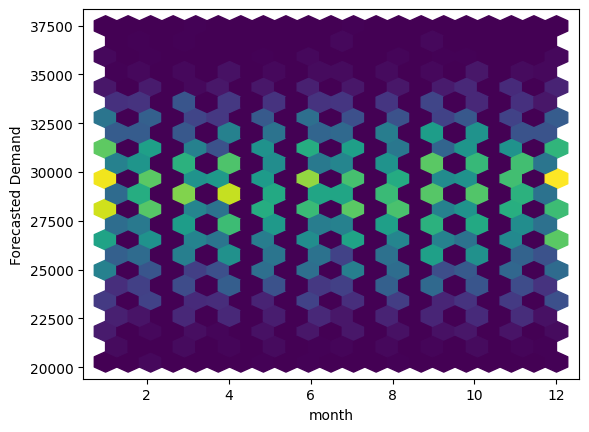

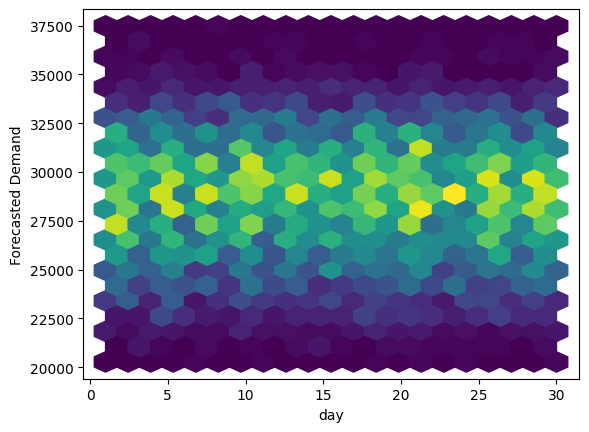

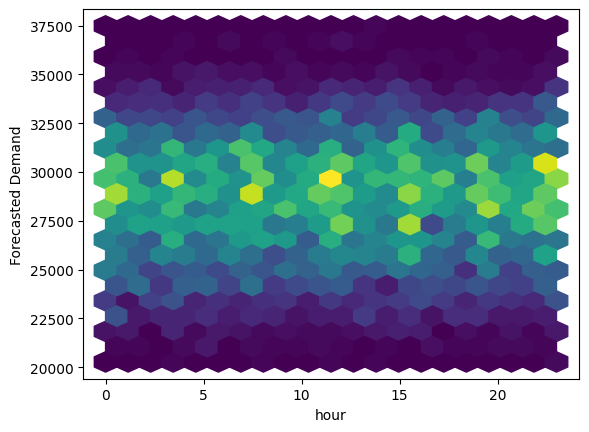

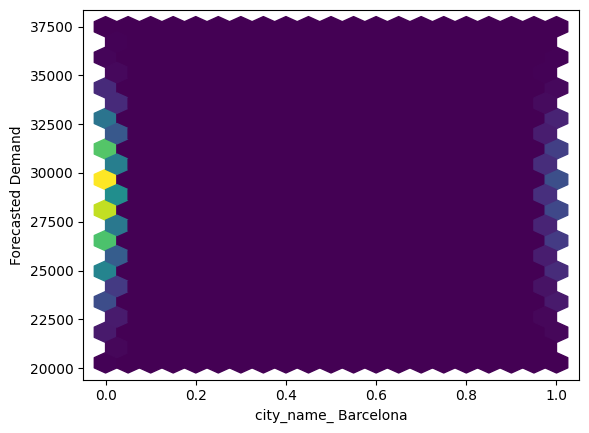

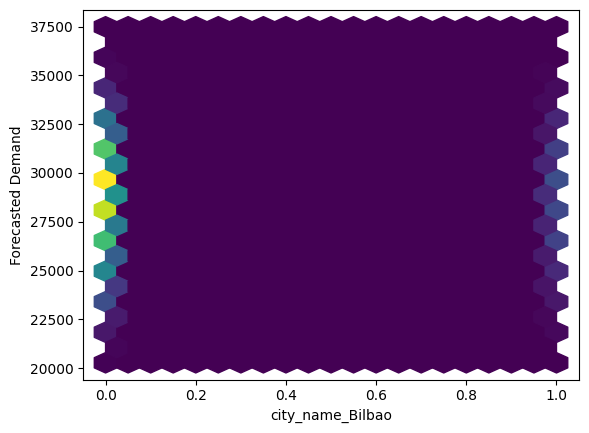

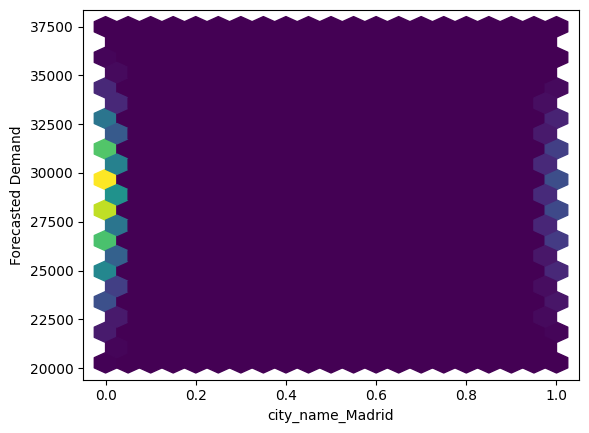

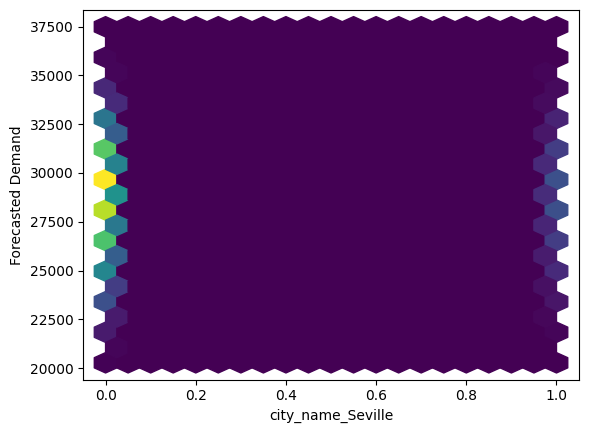

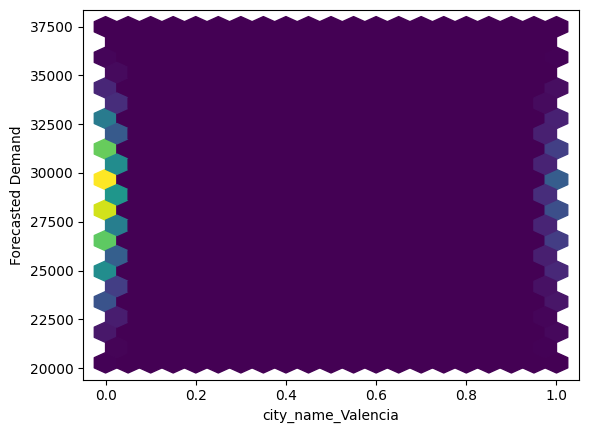

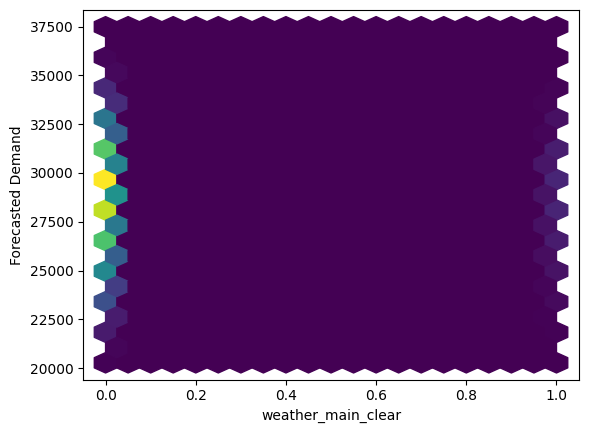

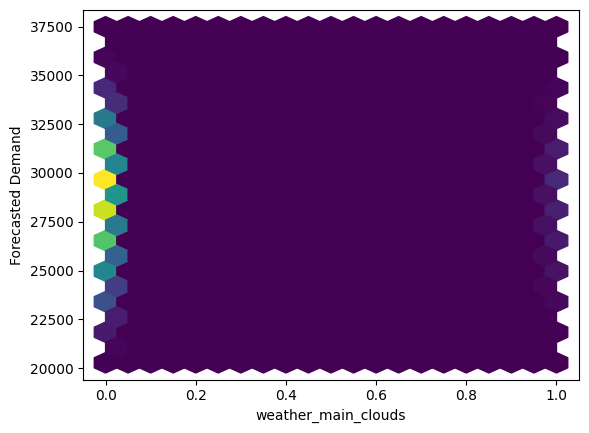

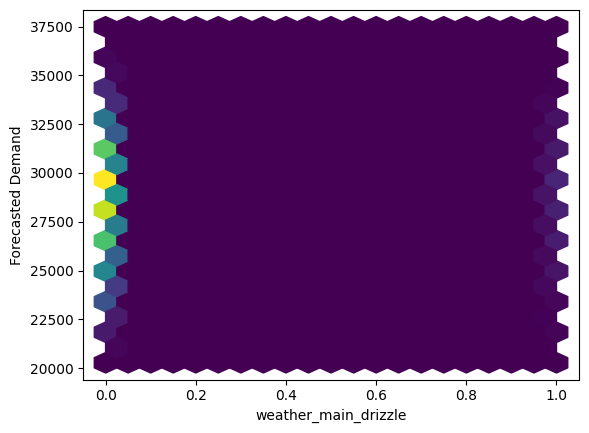

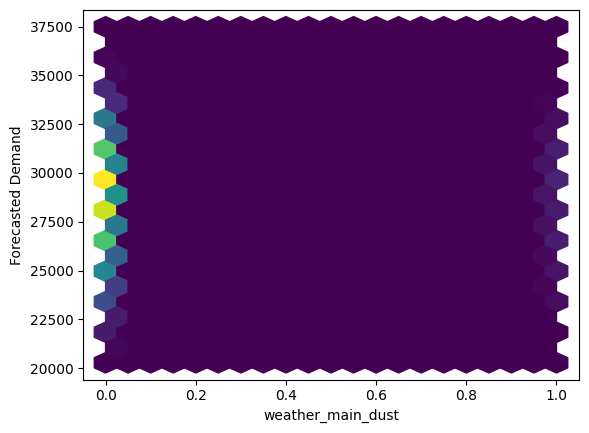

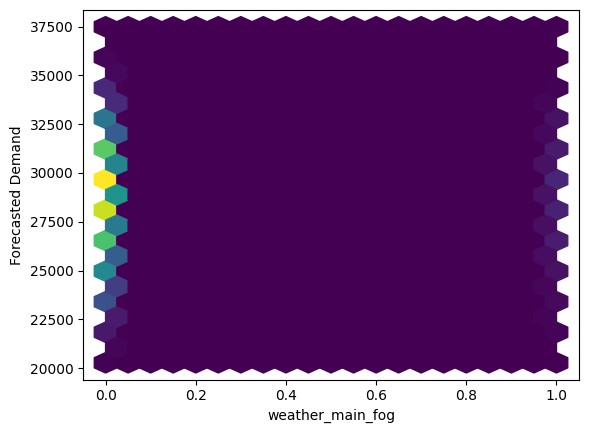

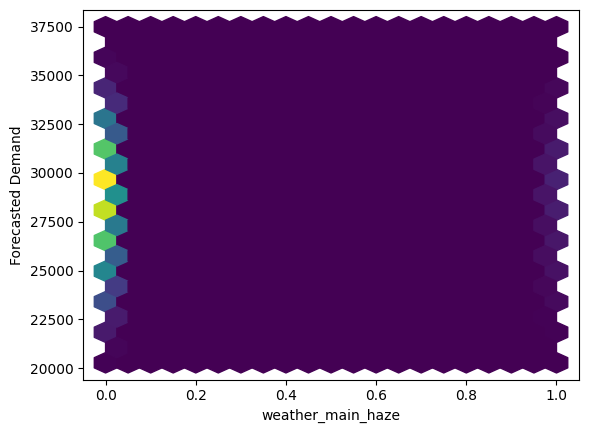

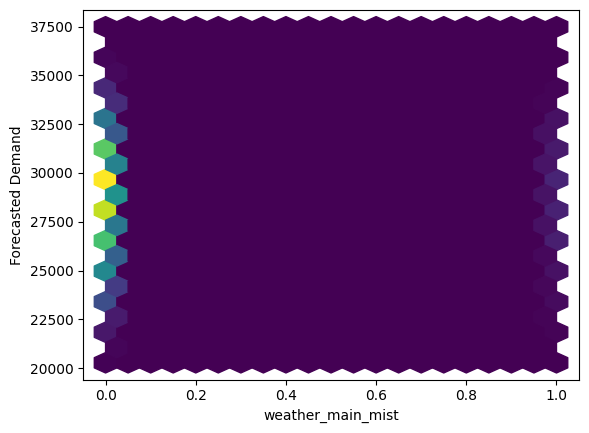

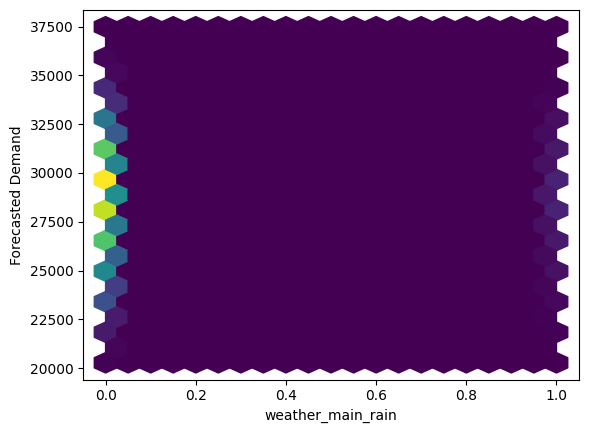

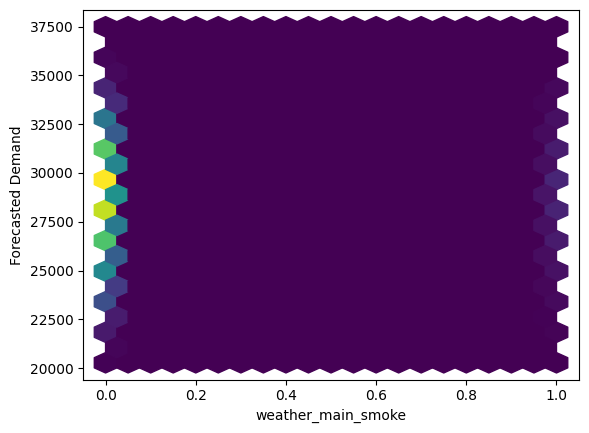

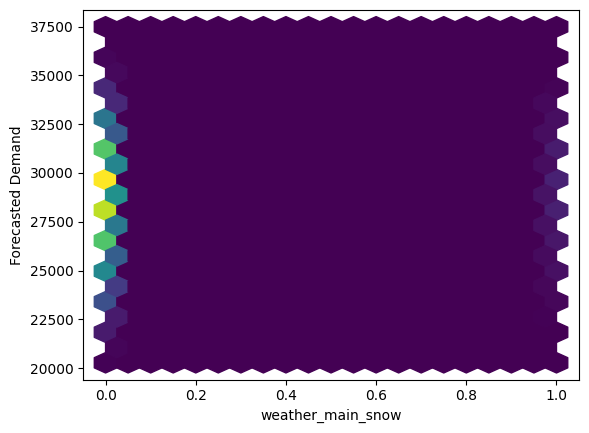

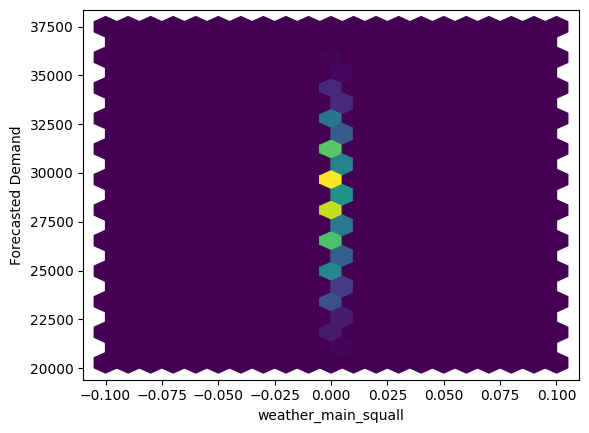

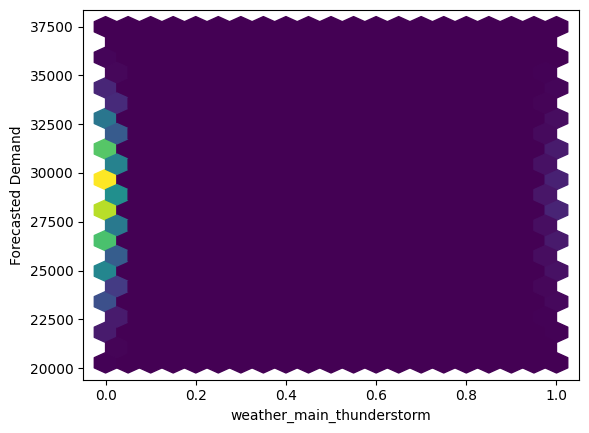

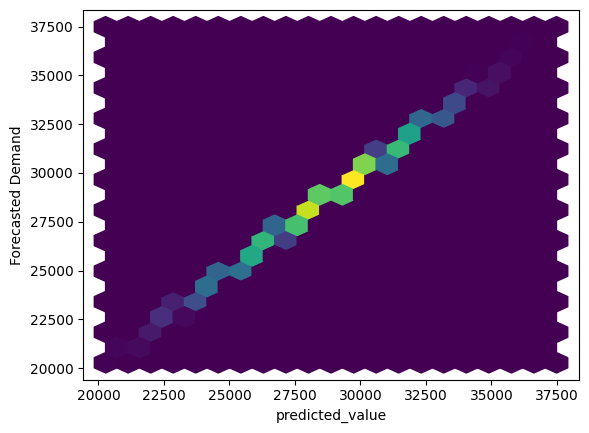

In [31]:
import matplotlib.pyplot as plt


num_cols = df_predictions.select_dtypes(include=['float', 'int']).columns

for col in num_cols:
    plt.hexbin(df_predictions[col], df_predictions['predicted_value'], gridsize=20)
    plt.xlabel(col)
    plt.ylabel('Forecasted Demand')
    plt.show()
